<a href="https://colab.research.google.com/github/galitneu/auto-eda-tool/blob/main/eda_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving pain_survey_1500.csv to pain_survey_1500 (3).csv
רמת_כאב int64
הסבר_מהרופא object
נטלה_משככי_כאבים_לפני_הבדיקה object
דרכים_אחרות_להקלה_בבדיקה object
דרכים_אחרות__תיאור object
העלתה_את_נושא_הכאב object
התיחסות_הרופא_לכאב object
מגדר_הרופא object
מסגרת object
הבדיקה_השגרתית_האחרונה object
תדירות_בדיקה object
חרדה_לקראת_בדיקה_הבאה float64
אפשרויות__גדלים_שונים_של_ספקולום object
אפשרויות__הכנסה_עצמית_של_מתמר_האולטרסאונד_או_הספקולום object
אפשרויות___חימום_של_הספקולום_או_חימום_של_גל_האולטרהסאונד object
אפשרויות__משככי_כאבים_ללא_מרשם_אקמול_אדוויל_וכדומה_או_תרופות_הרגעה object
אפשרויות__ספריי_או_גל_אלחוש_מקומי object
אפשרויות__גז_צחוקטשטוש object
אפשרויות__תרגילי_נשימה_והרפייה_או_תפילה object
אפשרויות__הסחת_דעת_תוך_כדי_הבדיקה object
גיל float64
מצב_משפחתי object
מספר_ילדים float64
איזור_מגורים object
דת object
test object
רמת_הכנסה object
אנדו object
וולווה object
תסמונות_ומצבים_אחרים object
           רמת_כאב  חרדה_לקראת_בדיקה_הבאה          גיל   מספר_ילדים
count  1500.000000        

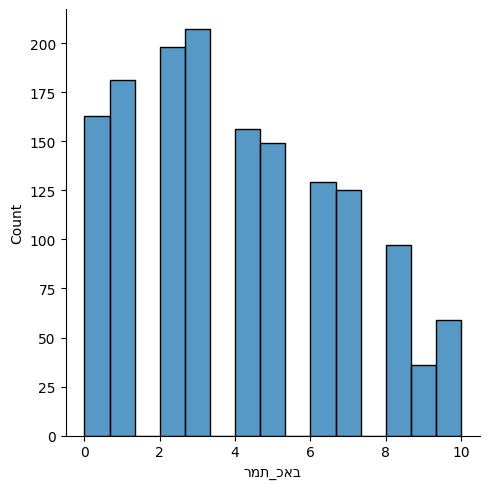

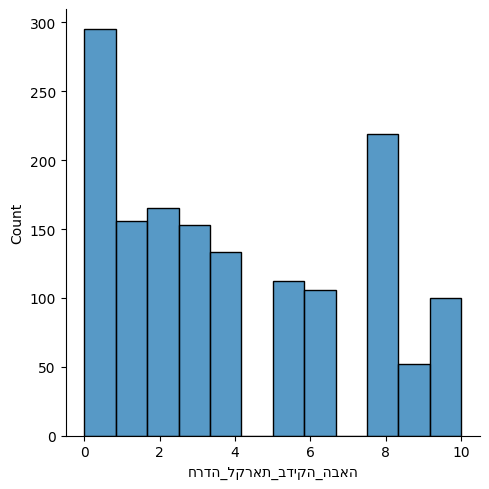

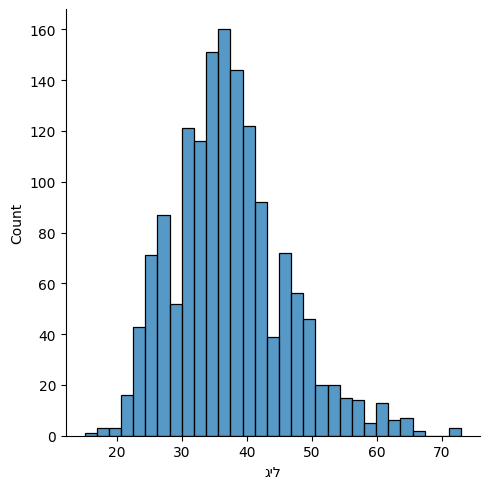

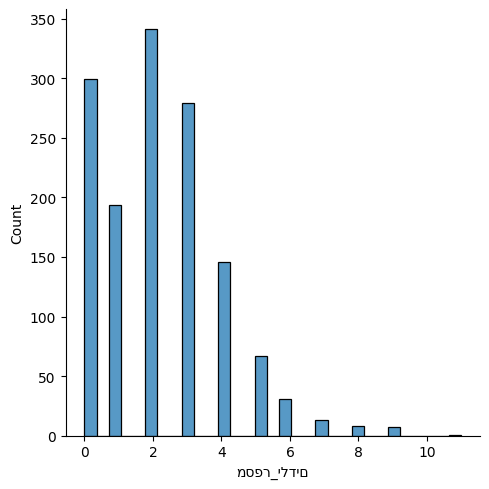

                        רמת_כאב  חרדה_לקראת_בדיקה_הבאה       גיל  מספר_ילדים
רמת_כאב                1.000000               0.576259 -0.122821   -0.132875
חרדה_לקראת_בדיקה_הבאה  0.576259               1.000000 -0.137387   -0.120075
גיל                   -0.122821              -0.137387  1.000000    0.327068
מספר_ילדים            -0.132875              -0.120075  0.327068    1.000000


In [5]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

uploaded=files.upload()
if uploaded:
    filename = list(uploaded.keys())[0]
    df= pd.read_csv(filename)

    #כמה עמודות וכמה שורות
    row=df.shape[0]
    col=df.shape[1]

    #מאיזה סוג של עמודה
    for cname,ctype in df.dtypes.items():
        print(cname,ctype)

    #שדות מספריים
    numeric_df = df.select_dtypes(include=np.number)
    print(numeric_df.describe())

    #שדות מספריים שחסרים בהם ערכים
    print(numeric_df.isnull().sum())


    for c in numeric_df.columns:
          sns.displot(data=numeric_df, x= c)
          plt.show()

    if numeric_df.shape[1]>1:
       corr_matrix=numeric_df.corr()
       print(corr_matrix)









